In [16]:
# This should look familiar by now:
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import pandas as pd
import numpy as np

# For examining results
from sklearn.metrics import confusion_matrix
import seaborn as sn

num_classes = 12 
input_size = 30
datasets = '../../datasets'

# Let's name the columns of data to help keep track
grade_decode = {
    0: "F",  1: "D", 2: "D+", 3: "C-", 4: "C",
    5: "C+", 6: "B-", 7: "B", 8: "B+", 9: "A-", 10: "A", 11: 'GAP'
}

x_train_df = pd.read_csv(f'{datasets}/x_train-fine.csv')
y_train_df = pd.read_csv(f'{datasets}/y_train-fine.csv')
x_test_df = pd.read_csv(f'{datasets}/x_test-fine.csv')
y_test_df = pd.read_csv(f'{datasets}/y_test-fine.csv')

#(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_data = training_images.reshape(training_images.shape[0], image_size) 
#test_data = test_images.reshape(test_images.shape[0], image_size)

#training_labels = to_categorical(training_labels, num_classes)
#test_labels = to_categorical(test_labels, num_classes)

(x_train_df.shape, y_train_df.shape, x_test_df.shape, y_test_df.shape)

((25688, 30), (25688, 12), (6479, 30), (6479, 12))

In [17]:
# A helpful function we'll be using all over the place to plot training information:
def plot_training_history(history, model, loss_function):
    figure = plt.figure()
    figure.suptitle(loss_function)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()
    
    figure.tight_layout()
    plt.show()
    
    loss, accuracy  = model.evaluate(x_test_df.values, y_test_df.values, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

In [18]:
# We'll use this same model multiple times
def fresh_model():
    model = Sequential()
    model.add(Dense(units=128, activation='relu', input_shape=(input_size,)))
    #model.add(Dense(units=64, activation='relu'))
    #model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=num_classes, activation='softmax'))
    
    return model


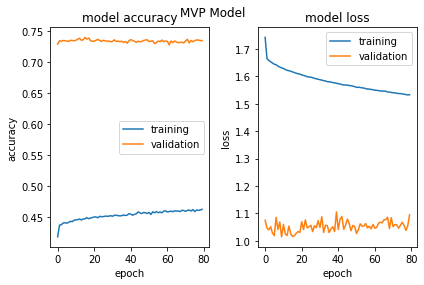

Test loss: 1.63
Test accuracy: 0.466


In [19]:
model = fresh_model()
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_df.values, y_train_df.values, batch_size=32, epochs=80, verbose=False, validation_split=.1)
plot_training_history(history, model, 'MVP Model')

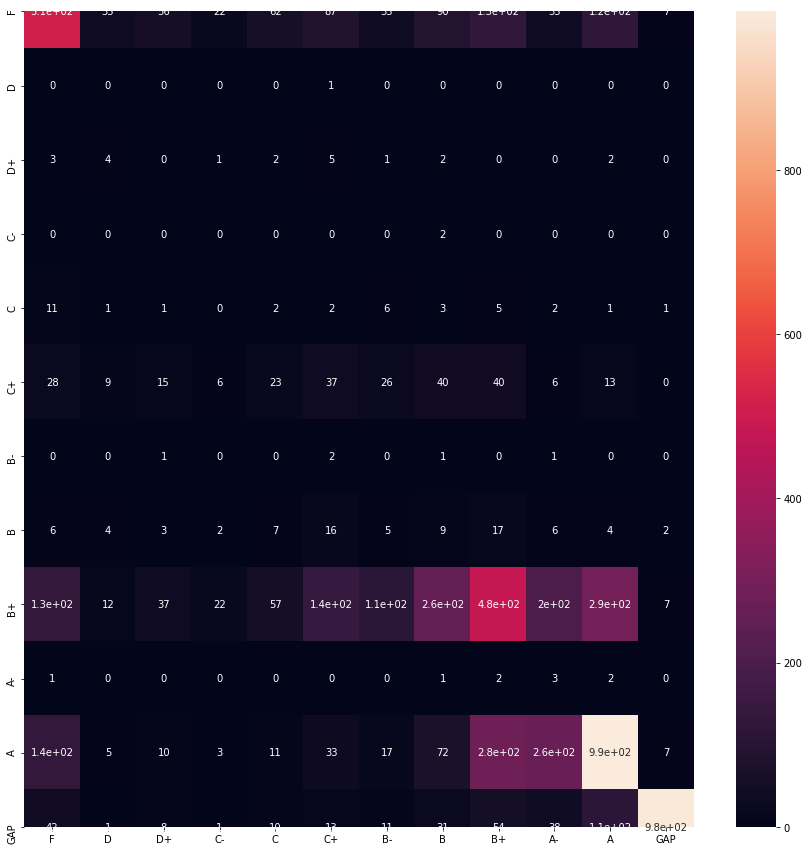

In [20]:
# When did our evaluator do poorly?

name_labels = list(grade_decode.values())

predictions = model.predict(x_test_df.values)
cm = confusion_matrix(np.argmax(predictions, axis=1), np.argmax(y_test_df.values, axis=1))
plt.figure(figsize = (15, 15))

sn.heatmap(cm, annot=True, xticklabels=name_labels, yticklabels=name_labels)
plt.show()